In [12]:
import IPython.display as ipd
import librosa
import librosa.display
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
g3_file_path = './audios/piano-G3.wav'

In [5]:
ipd.Audio(g3_file_path)

In [8]:
g3_signal, sr = librosa.load(g3_file_path)

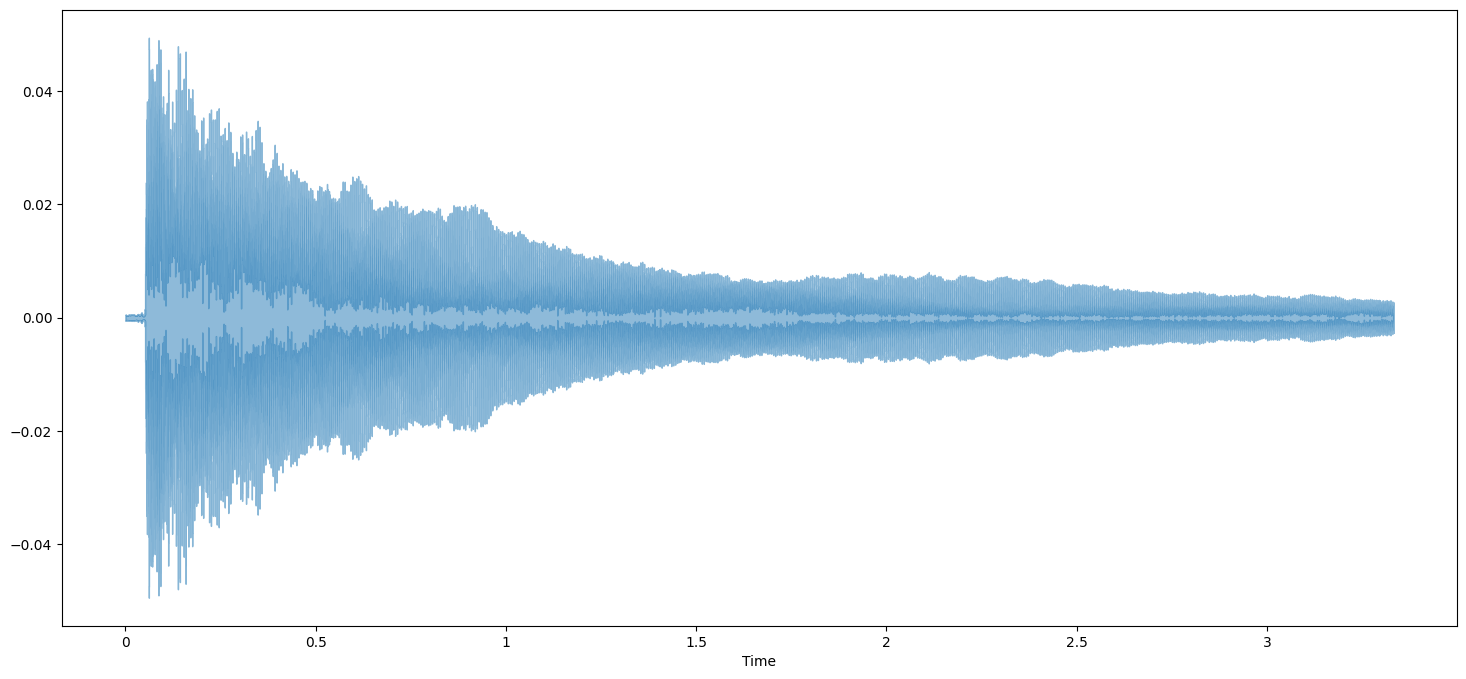

In [11]:
plt.figure(figsize= (18, 8))
librosa.display.waveshow(g3_signal, sr = sr, alpha = .5)
plt.show()

In [14]:
# derive the spectrum using Furier Transform
ft = sp.fft.fft(g3_signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

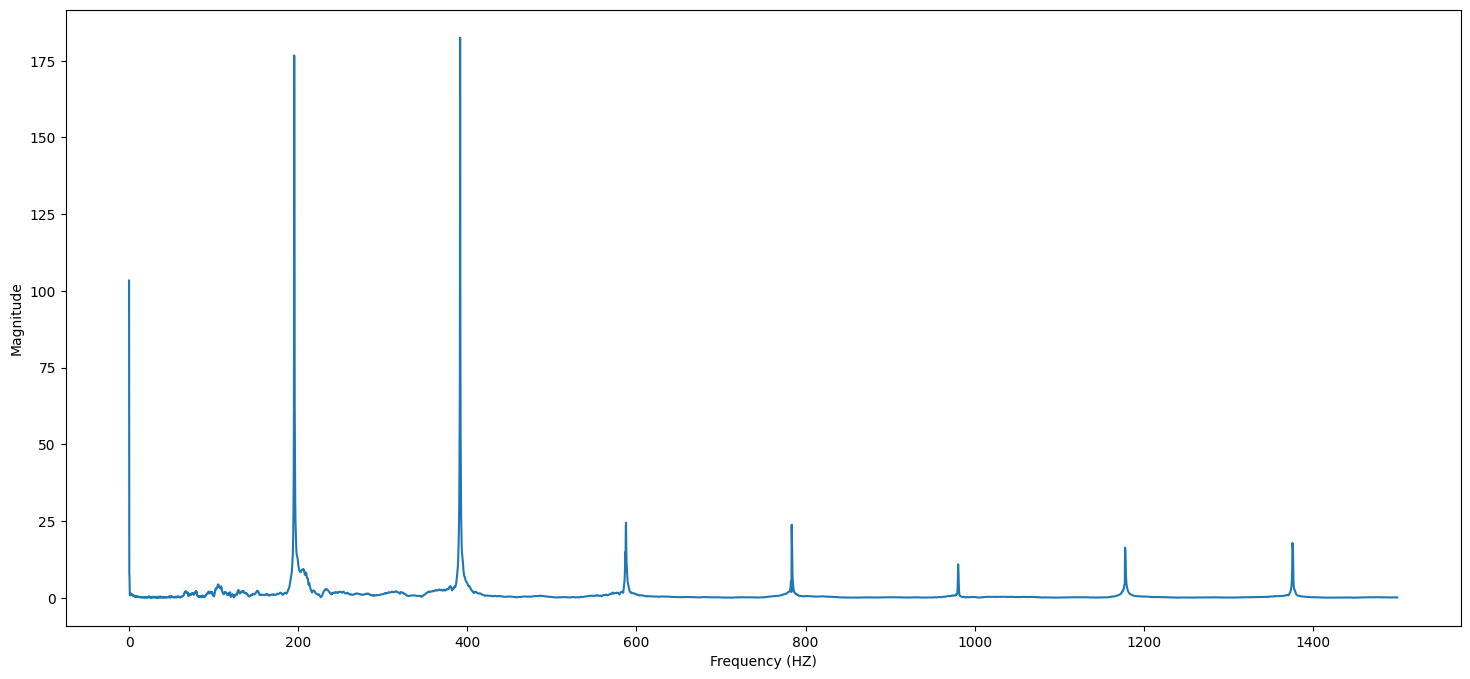

In [18]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000], )
plt.xlabel('Frequency (HZ)')
plt.ylabel('Magnitude')
plt.show()

In [35]:
# d_196/d * 10 = 1125 I want 10 periods of the signal with 196Hz frequency
d = 1/sr
d_196 = 1/196
d_1125_samples = 1125 * d

print(f'the length of signal array which is the number of samples in whole signal is:{len(g3_signal)}')
print(f'sample rate is {sr}')
print(f'duration of the each sample is {d}')
print(f'the duration of the  196Hz is {d_196}')
print(f'the duration of 400 samples is {d_1125_samples}')

the length of signal array which is the number of samples in whole signal is:73500
sample rate is 22050
duration of the each sample is 4.5351473922902495e-05
the duration of the  196Hz is 0.00510204081632653
the duration of 400 samples is 0.05102040816326531


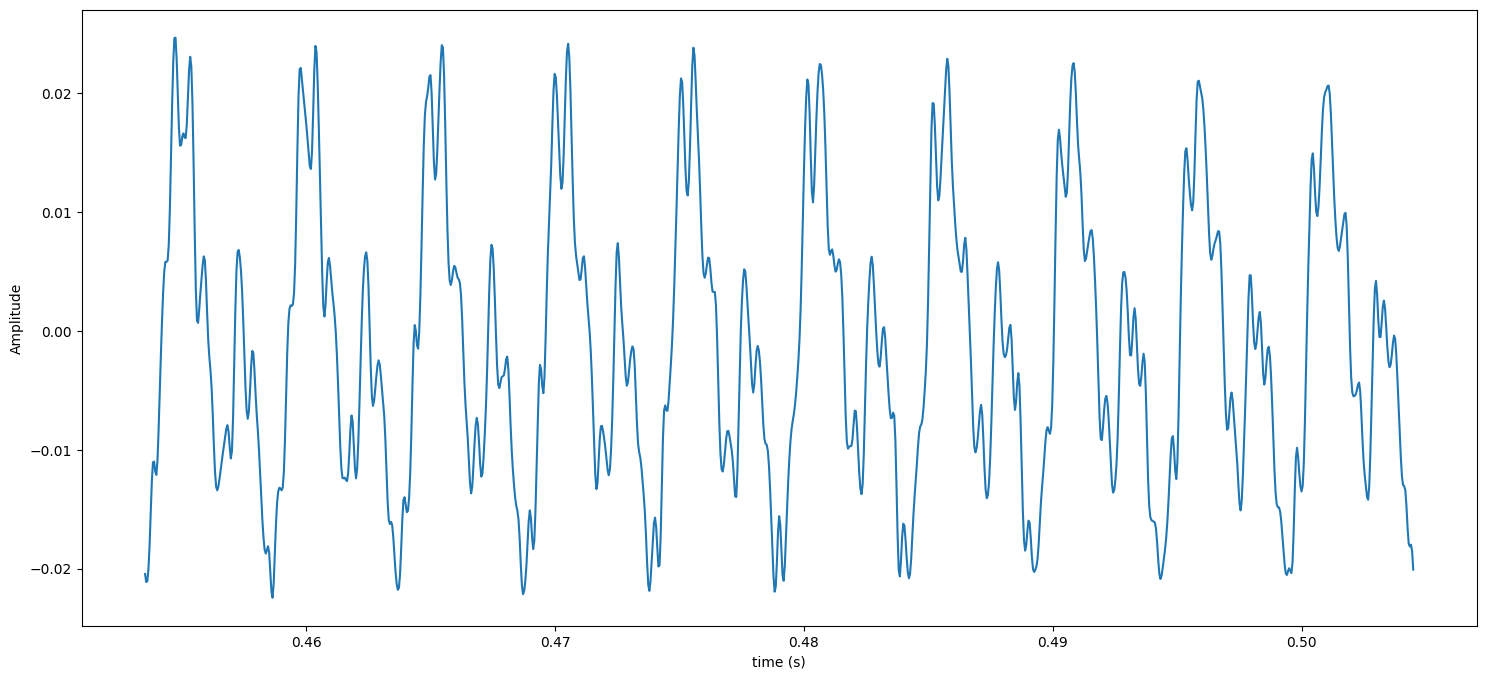

In [36]:
#plotting 10 periods of the signal in time-domain

samples = range(len(g3_signal))
t = librosa.samples_to_time(samples, sr= sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:11125], g3_signal[10000:11125])
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()


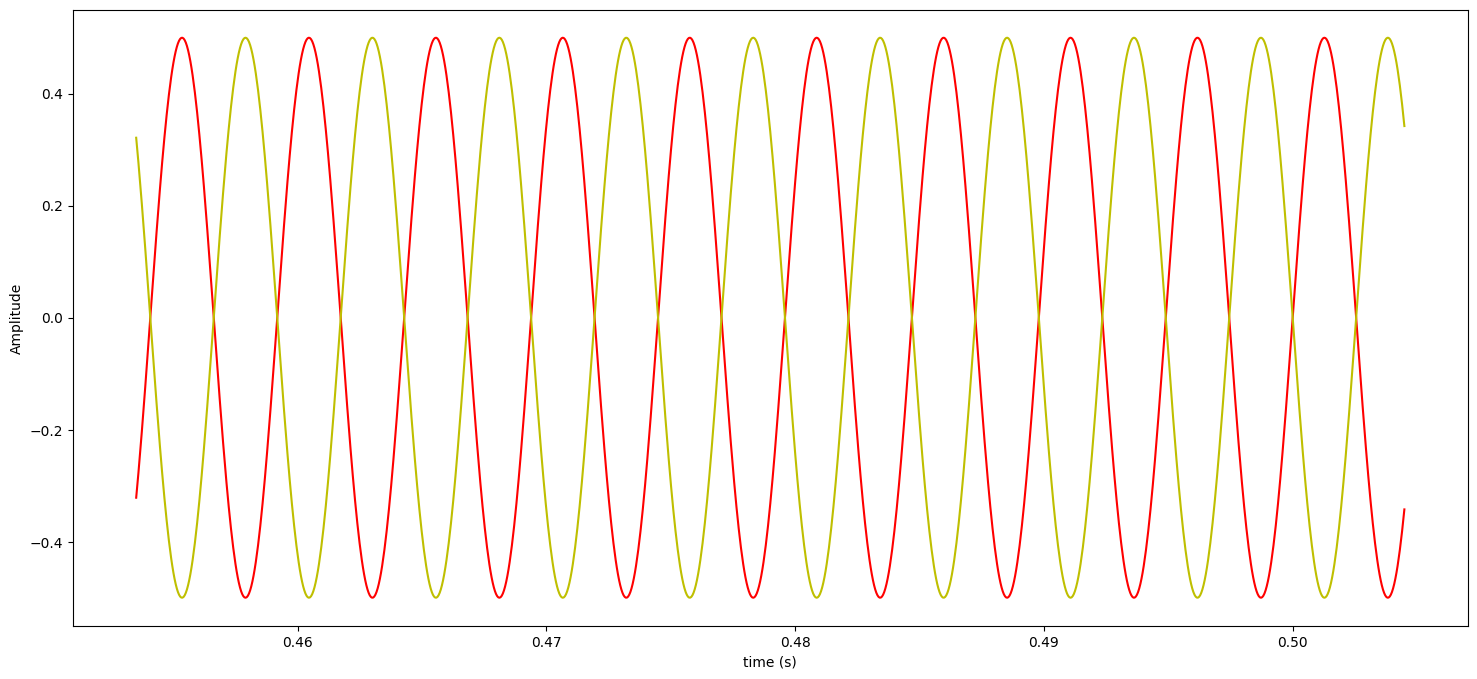

In [41]:
# plotting sinusoide of 196Hz
f = 196
phase = 0
phase1 = .5
phase2 = .75

sin = 0.5*np.sin(2*np.pi * (f*t - phase))
sin1 = 0.5*np.sin(2*np.pi * (f*t - phase1))
#sin2 = 0.5*np.sin(2*np.pi * (f*t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:11125], sin[10000:11125], 'r')
plt.plot(t[10000:11125], sin1[10000:11125], 'y')
#plt.plot(t[10000:11125], sin2[10000:11125], 'b')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()

# as you can see it is perfectly aligned because the frequency of the original signal is 196Hz


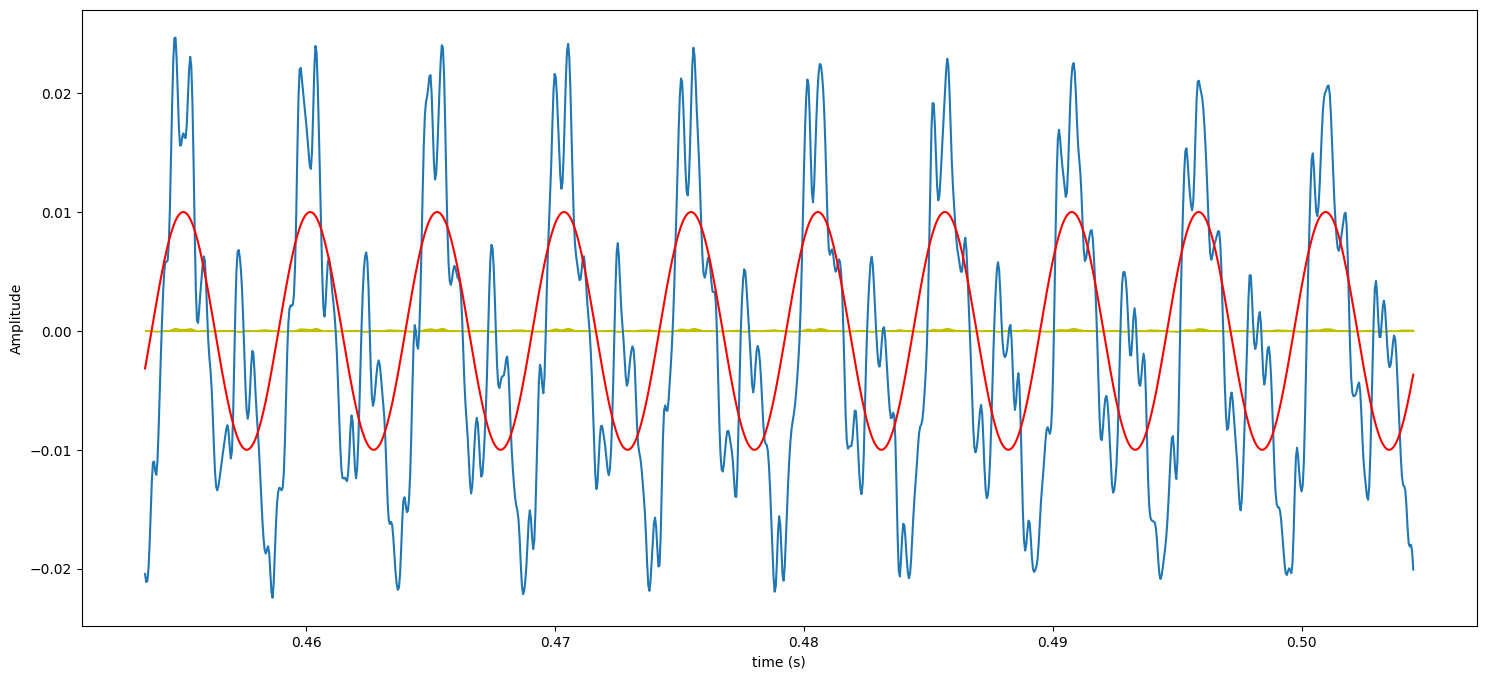

In [63]:
# compare sinusoid with original signal
phase = 0.94
f = 196

sin = 0.01 * np.sin(2*np.pi*(f*t - phase))
plt.figure(figsize=(18, 8))
plt.plot(t[10000:11125], g3_signal[10000:11125])
plt.plot(t[10000:11125], sin[10000:11125], 'r')
plt.fill_between(t[10000:11125], g3_signal[10000:11125] * sin[10000:11125], color='y')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()

# processes of Fourier transform

![image](./images/F_process.png)

# Formulas
* calculating phase and magnitude

![image](./images/Fourier_formula.png)